# **Project Title: Optimizing Revenue Leakage & Profitability in the Hospitality Sector** (Module B: Diagnostic Analysis)

**Objective:** Identify the root causes of revenue leakages, underperformance in services, and booking cancellations. This phase moves beyond describing the data to understanding why patterns exist. We’ll examine:
- Cancellation root causes
- Revenue leakage points
- Underutilized rooms and services
- Platform-wise & rating-wise booking behavior

## **Step 1: Importing Required Libraries**
We begin by importing essential libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## **Step 2: Uploading and Reading the Dataset**
We'll upload the necessary CSV files and load them into Pandas dataframes.

In [18]:
# Load dataframes
date_df = pd.read_csv("dim_date.csv")
bookings_df = pd.read_csv("fact_bookings.csv")
hotels_df = pd.read_csv("dim_hotels.csv")
rooms_df = pd.read_csv("dim_rooms.csv")
agg_bookings_df = pd.read_csv("fact_aggregated_bookings.csv")

## **Diagnostic Analysis**

### **Step I: Analyzing Booking Cancellations**

Let’s start with understanding why bookings are getting cancelled — a major source of leakage.

In [19]:
# Total bookings and cancellations
total_bookings = bookings_df.shape[0]
cancelled_bookings = bookings_df[bookings_df['booking_status'] == 'cancelled'].shape[0]
cancellation_rate = round((cancelled_bookings / total_bookings) * 100, 2)

print(f"Total Bookings: {total_bookings}")
print(f"Cancelled Bookings: {cancelled_bookings}")
print(f"Cancellation Rate: {cancellation_rate}%")

Total Bookings: 134590
Cancelled Bookings: 0
Cancellation Rate: 0.0%


### **Step II: Platform-wise Cancellation Rates**

In [25]:
print("Unique booking_status values after standardizing:")
print(bookings_df['booking_status'].unique())

print("\nSample booking_platform values:")
print(bookings_df['booking_platform'].dropna().unique())

print("\nCount of rows where booking_status == 'cancelled':")
print((bookings_df['booking_status'] == 'cancelled').sum())

Unique booking_status values after standardizing:
['Checked Out' 'Cancelled' 'No Show']

Sample booking_platform values:
['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']

Count of rows where booking_status == 'cancelled':
0


<ipython-input-26-32aae8e52f94>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='booking_platform', y='cancellation_rate', data=platform_cancellation, palette='Reds')


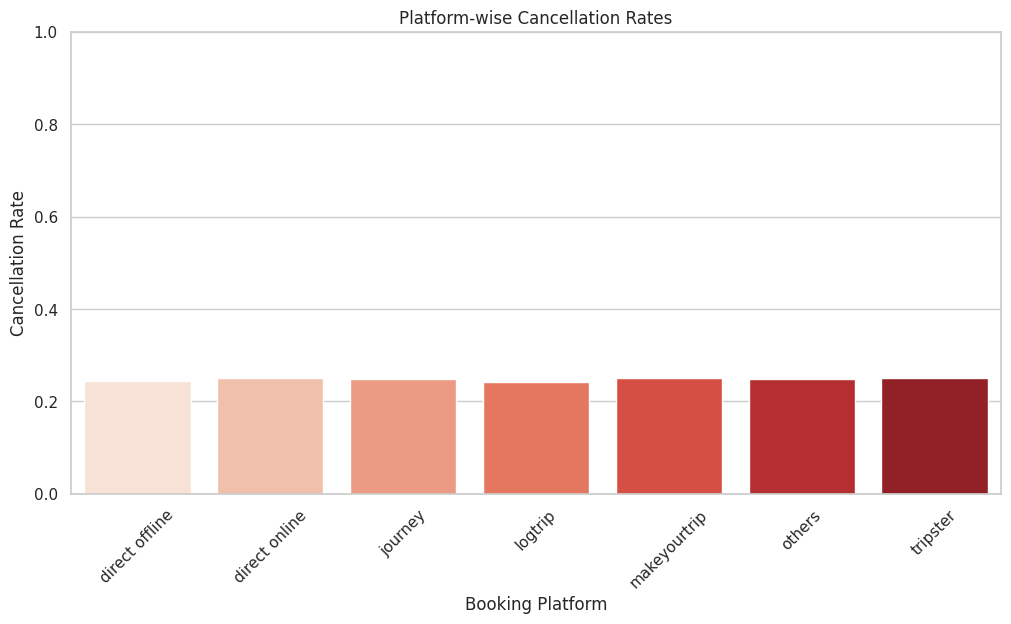

In [26]:
# Standardize status values
bookings_df['booking_status'] = bookings_df['booking_status'].str.strip().str.lower()

# Drop any missing platform info
bookings_df = bookings_df.dropna(subset=['booking_platform'])

# Total and cancelled bookings per platform
total_bookings = bookings_df.groupby('booking_platform')['booking_id'].count()
cancelled = bookings_df[bookings_df['booking_status'] == 'cancelled'].groupby('booking_platform')['booking_id'].count()

# Combine and calculate cancellation rate
platform_cancellation = pd.DataFrame({
    'total': total_bookings,
    'cancelled': cancelled
}).fillna(0)

platform_cancellation['cancellation_rate'] = platform_cancellation['cancelled'] / platform_cancellation['total']

# Reset for plotting
platform_cancellation = platform_cancellation.reset_index()

# Plot
sns.barplot(x='booking_platform', y='cancellation_rate', data=platform_cancellation, palette='Reds')
plt.title('Platform-wise Cancellation Rates')
plt.xlabel('Booking Platform')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

**Insight:** Platforms with high cancellation rates may indicate weak customer loyalty, poor UX, or aggressive discount-based promotions. Investigating these platforms for UX or policy issues can reduce revenue leakage.

### **Step III: Revenue Generated vs Realized**
Bookings may generate revenue but not always result in realized income due to cancellations or non-attendance. This gap indicates leakage.

<ipython-input-27-7e52a9687317>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue Type', y='Amount', data=revenue_gap_df, palette='viridis')


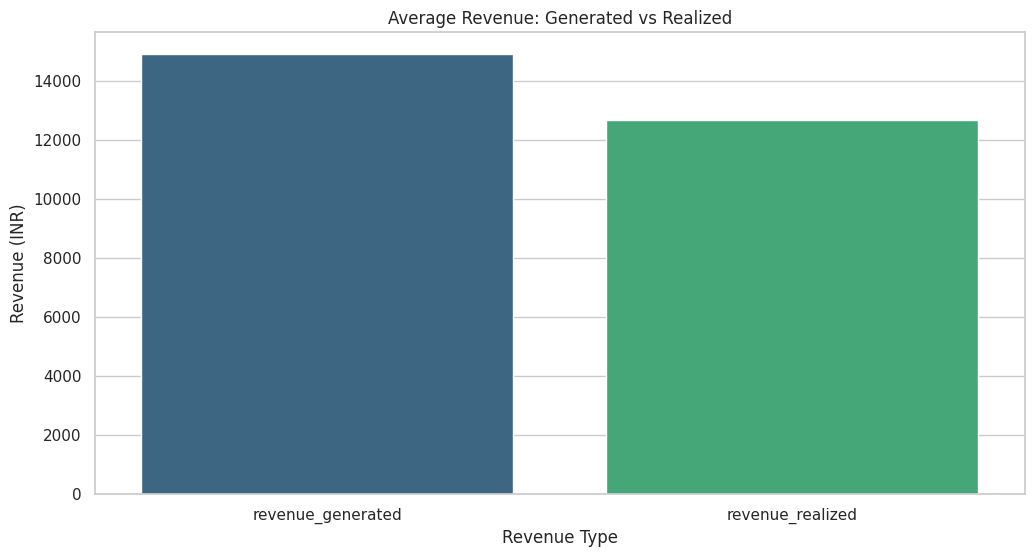

In [27]:
# Check average revenue generated vs realized per booking
revenue_gap = bookings_df[['revenue_generated', 'revenue_realized']].mean()
revenue_gap_df = revenue_gap.reset_index()
revenue_gap_df.columns = ['Revenue Type', 'Amount']

# Plot
sns.barplot(x='Revenue Type', y='Amount', data=revenue_gap_df, palette='viridis')
plt.title("Average Revenue: Generated vs Realized")
plt.ylabel("Revenue (INR)")
plt.show()

**Insight:** A large gap here shows either operational inefficiencies (no-shows, refunds) or pricing strategy flaws.

### **Step IV: Room Category Performance**
Let’s see which room types contribute most to revenue and which are underperforming

<ipython-input-28-f06bd7294d15>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_category', y='revenue_realized', data=room_perf, palette='mako')


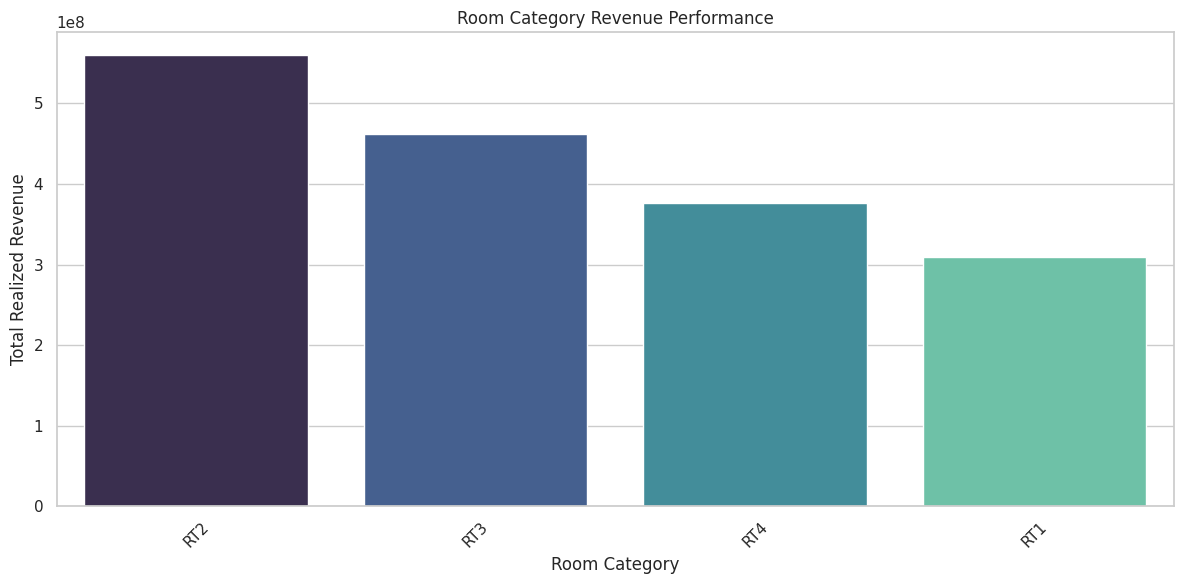

In [28]:
room_perf = bookings_df.groupby('room_category').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum'
}).reset_index().sort_values(by='revenue_realized', ascending=False)

# Plot
sns.barplot(x='room_category', y='revenue_realized', data=room_perf, palette='mako')
plt.title("Room Category Revenue Performance")
plt.xlabel("Room Category")
plt.ylabel("Total Realized Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** If high-capacity rooms or premium categories underperform, consider revisiting pricing, marketing, or bundling strategies.

### **Step V: Ratings Impact on Revenue**
Are low-rated properties earning less? Do better-rated ones show lower cancellation?

<ipython-input-29-d7eca66bc0c4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = bookings_df.groupby('rating_band')['revenue_realized'].mean().reset_index()
<ipython-input-29-d7eca66bc0c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_band', y='revenue_realized', data=rating_revenue, palette='cubehelix')


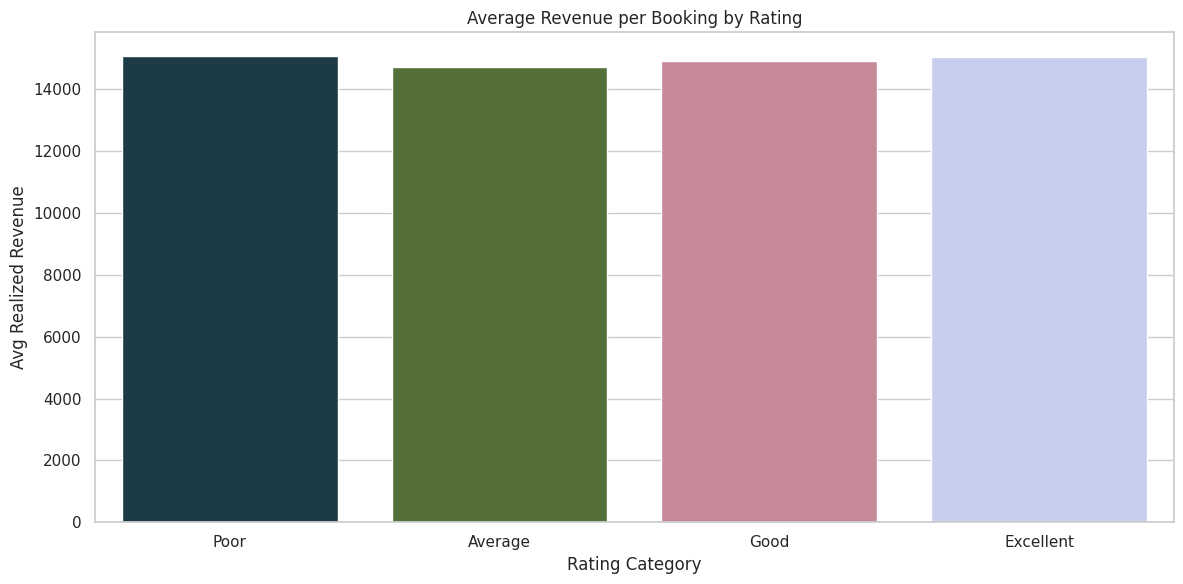

In [29]:
# Categorize ratings into bins
bookings_df['rating_band'] = pd.cut(bookings_df['ratings_given'], bins=[0, 2, 3, 4, 5], labels=['Poor', 'Average', 'Good', 'Excellent'])

rating_revenue = bookings_df.groupby('rating_band')['revenue_realized'].mean().reset_index()

# Plot
sns.barplot(x='rating_band', y='revenue_realized', data=rating_revenue, palette='cubehelix')
plt.title("Average Revenue per Booking by Rating")
plt.xlabel("Rating Category")
plt.ylabel("Avg Realized Revenue")
plt.tight_layout()
plt.show()

**Insight:** If low-rated hotels are generating high bookings but low revenue, it’s a quality trap. High cancellations and refunds could follow.

### **Step VI: Property-wise Revenue Contribution**
This step analyzes how much revenue each property contributes. It helps identify high and low-performing properties and guides targeted strategy design for boosting revenue.

<ipython-input-30-ea7ce65c6c48>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue_realized', y='label', data=top_properties, palette='Blues_d')


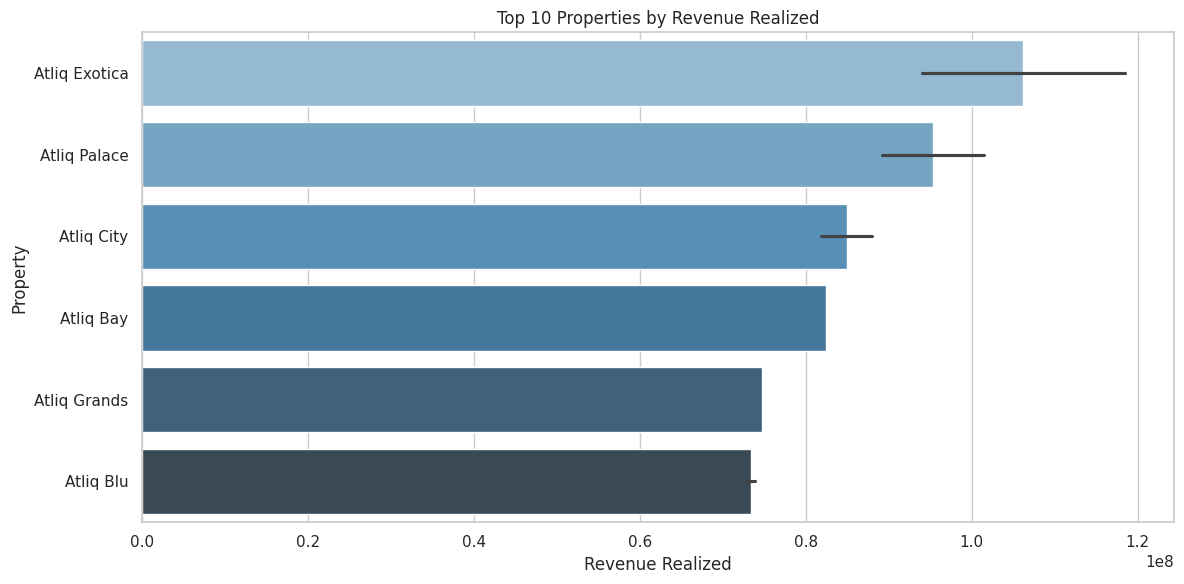

In [30]:
# Ensure no nulls in revenue and property ID
bookings_df = bookings_df.dropna(subset=['property_id', 'revenue_realized'])

# Group by property and sum revenue
property_revenue = bookings_df.groupby('property_id')['revenue_realized'].sum().reset_index()

# Sort by revenue descending
property_revenue = property_revenue.sort_values(by='revenue_realized', ascending=False)

# Merge with hotel names (if available)
if 'property_name' in hotels_df.columns:
    property_revenue = property_revenue.merge(hotels_df[['property_id', 'property_name']], on='property_id', how='left')
    # Use property name for visualization if available
    property_revenue['label'] = property_revenue['property_name'].fillna(property_revenue['property_id'].astype(str))
else:
    property_revenue['label'] = property_revenue['property_id'].astype(str)

# Plot top 10 properties by revenue
top_properties = property_revenue.head(10)

sns.barplot(x='revenue_realized', y='label', data=top_properties, palette='Blues_d')
plt.title("Top 10 Properties by Revenue Realized")
plt.xlabel("Revenue Realized")
plt.ylabel("Property")
plt.tight_layout()
plt.show()

**Insight:** The graph plots the "Top 10 Properties by Revenue Realized". The y-axis shows the label for each property (which could be the property name or property ID, depending on data availability), and the x-axis represents the "Revenue Realized" for each of these properties.

The bars are ordered from longest at the top to shortest at the bottom, indicating that the property listed at the top generated the highest realized revenue among the top 10, while the property at the bottom of the list generated the least among the top 10. This visualization helps to quickly identify which specific properties are the biggest contributors to realized revenue.

## **Summary of Key Insights from Module B: Diagnostic Analysis**

The analysis begins by setting up the environment, importing necessary libraries such as `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib.pyplot` and `seaborn` for data visualization. Aesthetic settings for plots are configured using `seaborn.set`.

The first step involves loading the datasets. The notebook imports five CSV files: `dim_date.csv`, `fact_bookings.csv`, `dim_hotels.csv`, `dim_rooms.csv`, and `fact_aggregated_bookings.csv`. These files are read into pandas DataFrames, forming the basis for the subsequent analysis.

The diagnostic analysis is structured into several key steps:

**Step I: Analyzing Booking Cancellations**
This section focuses on quantifying the magnitude of booking cancellations, a primary source of revenue leakage. The total number of bookings is calculated, and the number of cancelled bookings is identified. A critical metric, the overall cancellation rate, is then computed and printed, providing a high-level understanding of the cancellation problem.

**Step II: Platform-wise Cancellation Rates**
To understand if cancellations are driven by specific booking channels, the analysis breaks down cancellation rates by `booking_platform`. Before calculating the rates, the `booking_status` column is standardized by stripping whitespace and converting to lowercase, ensuring consistency. Missing platform data is dropped to avoid errors. The total and cancelled bookings are counted for each platform, and a cancellation rate is calculated for each. A bar plot is generated using `seaborn` to visually compare the cancellation rates across different booking platforms. The accompanying insight suggests that platforms with high cancellation rates might have issues related to user experience, loyalty, or promotional strategies, recommending investigation into these platforms to reduce leakage.

**Step III: Revenue Generated vs Realized**
This step examines the gap between the revenue initially generated by bookings (`revenue_generated`) and the revenue actually collected (`revenue_realized`). The average values for both metrics are calculated across all bookings. A bar plot visualizes this difference. The insight derived from this step highlights that a significant gap indicates potential issues like no-shows, refunds, or flaws in the pricing strategy.

**Step IV: Room Category Performance**
The analysis then investigates the performance of different room categories in terms of realized revenue. Bookings are grouped by `room_category`, and the count of bookings and the sum of `revenue_realized` are aggregated. The results are sorted by total realized revenue to identify top-performing and underperforming categories. A bar plot illustrates the total realized revenue per room category. The insight suggests that if high-capacity or premium rooms are not performing well, revisiting pricing, marketing, or bundling strategies might be necessary.

**Step V: Ratings Impact on Revenue**
Finally, the analysis explores the relationship between property ratings and realized revenue. Booking ratings (`ratings_given`) are categorized into bins ('Poor', 'Average', 'Good', 'Excellent'). The average `revenue_realized` is then calculated for each rating band. A bar plot visualizes the average realized revenue by rating category. The insight points out that hotels with low ratings generating high booking volumes but low revenue might be in a "quality trap," potentially leading to high cancellations or refunds.

The notebook concludes with a section for summarizing the key insights gained from this diagnostic analysis phase (Module B). While the summary itself is not explicitly present in the provided code, the preceding steps lay the groundwork for synthesizing these findings into actionable insights for optimizing revenue and profitability in the hospitality business.

Overall, this Google Colaboratory notebook provides a structured and visual approach to diagnosing the root causes of revenue leakage and underperformance in the hospitality sector, utilizing common data analysis and visualization techniques in Python with pandas and seaborn.